In [72]:
from skimage import io
from skimage.filters import gaussian
from skimage.restoration import denoise_nl_means
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
import numpy as np
%matplotlib widget 

In [73]:
# ВВЕДИТЕ НАЗВАНИЕ ФАЙЛА
inputImg = "4.png"

In [74]:
img = io.imread("images/" + inputImg, as_gray=True)
img

array([[0.09250275, 0.11603216, 0.18550353, ..., 0.09679098, 0.19629647,
        0.32178667],
       [0.06145843, 0.08945216, 0.11884471, ..., 0.07550863, 0.18755961,
        0.32481451],
       [0.03418157, 0.04087804, 0.05203882, ..., 0.05032745, 0.19262   ,
        0.36909059],
       ...,
       [0.00366078, 0.00366078, 0.01224706, ..., 0.05089294, 0.04674118,
        0.04339294],
       [0.0031102 , 0.0031102 , 0.00864588, ..., 0.0531251 , 0.04367569,
        0.04144353],
       [0.03372118, 0.02979961, 0.0175149 , ..., 0.0531698 , 0.0331251 ,
        0.03089294]])

In [75]:
denoisedImg = denoise_nl_means(img, fast_mode=True, h=0.2)

denoisedGaussian = gaussian(denoisedImg, 3)

In [76]:
print(denoisedGaussian)

[[0.06753997 0.06772807 0.06799819 ... 0.16720016 0.17051127 0.17416103]
 [0.06740599 0.06761017 0.06793383 ... 0.168726   0.1725571  0.17661019]
 [0.06803081 0.06826636 0.06867484 ... 0.17100883 0.17551346 0.18008639]
 ...
 [0.13042121 0.13763115 0.14625007 ... 0.08931129 0.09095947 0.09227893]
 [0.11685312 0.12268595 0.12998451 ... 0.08936536 0.09109584 0.09247878]
 [0.10784952 0.11268566 0.11904234 ... 0.08947462 0.09127021 0.09270334]]


In [77]:
denoisedGaussian.shape

(1536, 2048)

In [78]:
results = []

for i in range(0, denoisedGaussian.shape[1], 4):
    mean = denoisedGaussian[:, i:i+4].mean(axis=1)
    results.append(mean)
    
new = np.column_stack(results)

[[0.06790948 0.07028422 0.07927019 ... 0.16411957 0.16546996 0.16918846]
 [0.06784428 0.07134531 0.08499631 ... 0.16185339 0.16470755 0.17092006]
 [0.06857956 0.07369367 0.09377099 ... 0.15903948 0.16396788 0.17346751]
 ...
 [0.14258737 0.1897663  0.29537359 ... 0.07310783 0.08207871 0.08998749]
 [0.12709832 0.17549408 0.29871528 ... 0.07251865 0.08176077 0.09007387]
 [0.11672118 0.16634496 0.30298136 ... 0.07212497 0.08157704 0.0902087 ]]


In [96]:
peakArray = []

for i in range(0, new.shape[1]):
    peaks, _ = find_peaks(-new[:, i], prominence=0.4)
    peakArray.append(peaks)

[ 256  793  820  981 1010 1086 1267]


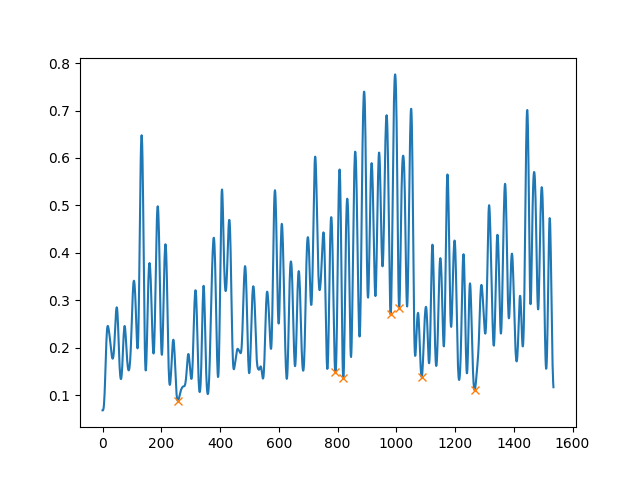

In [101]:
bruh = new[:,0]
peaks , properties = find_peaks(-bruh, prominence=0.4)

print(peaks)

fig1=plt.figure()
ax1=fig1.add_subplot(111)

ax1.plot(bruh)
ax1.plot(peaks, bruh[peaks], "x")
plt.show()

In [80]:
# ИЗМЕНИТЬ ЭТУ ПЕРЕМЕННУЮ ЧТОБЫ ПОЛУЧИТЬ ГРАФИК
target_plot = denoisedGaussian
# turn NP array into xyz plot
m,n = target_plot.shape
y,x = np.mgrid[:m,:n]
z = target_plot

#out = np.column_stack((C.ravel(),R.ravel(), denoisedGaussian.ravel()))

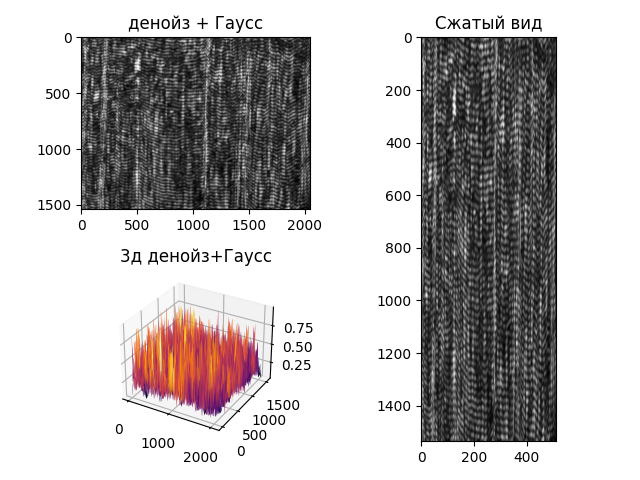

In [81]:
#######################
# ПОСТРОЕНИЕ ГРАФИКОВ #
#######################

fig = plt.figure()

ax=fig.add_subplot(221)
ax.imshow(denoisedGaussian, cmap='gray')
ax.set_title("денойз + Гаусс")

# ax=fig.add_subplot(212)
# ax.imshow(img, cmap='gray')
# ax.set_title("original")

ax=fig.add_subplot(223, projection='3d')
ax.plot_surface(x, y ,z, cmap ='inferno')
ax.set_title("3д денойз+Гаусс")

ax=fig.add_subplot(122)
ax.imshow(new, cmap='gray')
ax.set_title("Сжатый вид")

fig.tight_layout()
plt.show()